#  Dataset: House Prices - Advanced Regression Techniques

---

##  Objetivo del dataset
- **Meta principal**: **Predecir el precio de venta de una casa (`SalePrice`)** en la ciudad de Ames (Iowa, EE.UU.).
- **Cómo se logra**: mediante modelos de **regresión múltiple** u otros algoritmos de Machine Learning, usando como insumo las características de la casa (tamaño, materiales, condiciones, ubicación, etc.).

---

##  Pasos para llegar al objetivo
1. **Comprensión del problema**  
   - Variable dependiente: `SalePrice`.
   - Variables independientes: características estructurales, de ubicación, materiales y extras.

2. **Exploración de los datos (EDA)**  
   - Revisar registros, valores nulos, tipos de datos.
   - Generar estadísticas descriptivas y distribuciones.

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Tratar valores atípicos.
   - Agrupar categorías poco frecuentes.

4. **Codificación de variables categóricas**  
   - Usar *One Hot Encoding* o *Label Encoding*.

5. **Escalamiento / Normalización**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.

6. **Selección de variables relevantes**  
   - Usar correlaciones, ANOVA o técnicas de *feature selection*.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.

---

##  Resumen de variables principales
El dataset contiene **79 variables**. Algunos ejemplos clave:

- **Lote**
  - `MSSubClass`: tipo de vivienda (1 piso, 2 pisos, dúplex, PUD).  
  - `MSZoning`: zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de fachada.  
  - `LotArea`: área del terreno.  
  - `LotShape`: forma del lote (regular, irregular).  
  - `LandContour`: topografía (plano, pendiente, depresión).  
  - `Neighborhood`: barrio donde se ubica la casa.  

- **Construcción**
  - `BldgType`: tipo de construcción (unifamiliar, dúplex, townhouse).  
  - `HouseStyle`: estilo (1 piso, 2 pisos, split-level).  
  - `OverallQual`: calidad general (1 = muy mala, 10 = excelente).  
  - `OverallCond`: estado general de la vivienda.  
  - `YearBuilt`: año de construcción.  
  - `YearRemodAdd`: año de remodelación.  
  - `RoofStyle` / `RoofMatl`: tipo y material del techo.  
  - `Exterior1st` / `Exterior2nd`: material exterior.  

- **Sótano**
  - `BsmtQual`, `BsmtCond`: calidad y estado del sótano.  
  - `BsmtExposure`: exposición (ventanas, walkout).  
  - `TotalBsmtSF`: área total del sótano.  

- **Habitabilidad**
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: baños.  
  - `Bedroom`, `Kitchen`: habitaciones y cocinas.  
  - `TotRmsAbvGrd`: total de cuartos.  

- **Extras**
  - `Fireplaces`, `FireplaceQu`: chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: características del garaje.  
  - `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`: áreas exteriores y amenidades.  

- **Venta**
  - `MoSold`, `YrSold`: mes y año de venta.  
  - `SaleType`: tipo de venta (convencional, cash, VA loan).  
  - `SaleCondition`: condiciones de la venta (normal, familiar, parcial, etc.).  

- **Target**
  - `SalePrice`: precio de venta de la vivienda (variable a predecir).

---

##  En resumen
El dataset busca **explicar y predecir el precio de las casas** usando información estructural, de ubicación, calidad de materiales, extras y condiciones de venta.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [35]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Dimensiones del conjunto de entrenamiento:", train.shape)
print("Dimensiones del conjunto de prueba:", test.shape)

X_train = train.drop(columns=["SalePrice"])
y_train = train["SalePrice"]


print(X_train.info())


display(X_train.describe())


print("\nValores nulos más frecuentes:")
print(X_train.isnull().sum().sort_values(ascending=False).head())


Dimensiones del conjunto de entrenamiento: (1460, 81)
Dimensiones del conjunto de prueba: (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000



Valores nulos más frecuentes:
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
dtype: int64


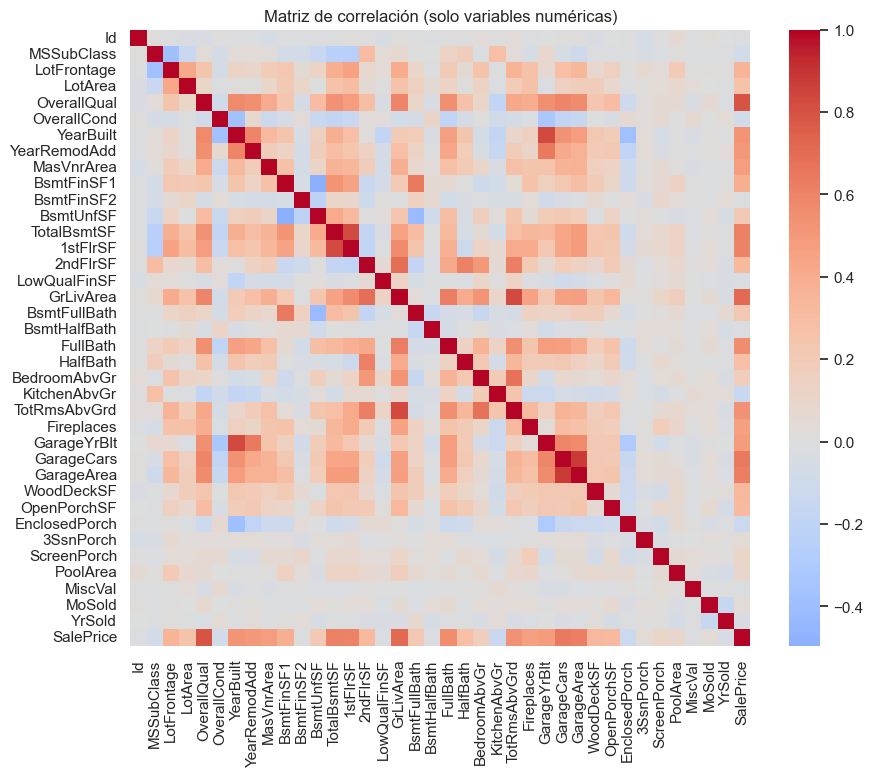


Variables más correlacionadas con SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [36]:
numeric_train = train.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (solo variables numéricas)")
plt.show()

corr_target = corr_matrix["SalePrice"].sort_values(ascending=False)
print("\nVariables más correlacionadas con SalePrice:")
print(corr_target.head(10))


In [37]:
threshold = len(X_train) * 0.3
cols_to_drop = X_train.columns[X_train.isnull().sum() > threshold]
X_train = X_train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    median = X_train[col].median()
    X_train[col] = X_train[col].fillna(median)
    test[col] = test[col].fillna(median)


cat_cols = X_train.select_dtypes(include=["object"]).columns
for col in cat_cols:
    X_train[col] = X_train[col].fillna("None")
    test[col] = test[col].fillna("None")

print("Limpieza de datos completada ")


Limpieza de datos completada 


In [38]:
train = train[train["GrLivArea"] < 4000]
X_train = train.drop(columns=["SalePrice"])
y_train = train["SalePrice"]

for df in [X_train, test]:
    df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
    df["Age"] = df["YrSold"] - df["YearBuilt"]
    df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]
    df["HasGarage"] = (df["GarageArea"] > 0).astype(int)

print("Variables nuevas creadas ")

Variables nuevas creadas 


In [39]:
label_encoders = {}

cat_cols = [col for col in X_train.select_dtypes(include=["object"]).columns if col in test.columns]

for col in cat_cols:
    le = LabelEncoder()
    combined_data = pd.concat([X_train[col], test[col]], axis=0)
    le.fit(combined_data)
    X_train[col] = le.transform(X_train[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

print("Codificación con Label Encoding completada ")
print(f"Total de columnas codificadas: {len(cat_cols)}")


Codificación con Label Encoding completada 
Total de columnas codificadas: 37


In [40]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

scaler = StandardScaler()
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)

missing_num_cols = [c for c in num_cols if c not in test.columns]
for c in missing_num_cols:
    test[c] = np.nan

X_test_num = pd.DataFrame(
    scaler.transform(test[num_cols]),
    columns=num_cols,
    index=test.index
)

shared_cat_cols = [c for c in cat_cols if c in test.columns]
X_train_cat = X_train[shared_cat_cols].copy()
X_test_cat = test[shared_cat_cols].copy()

for col in shared_cat_cols:
    le = LabelEncoder()
    combined = pd.concat([X_train_cat[col], X_test_cat[col]], axis=0).astype(str)
    le.fit(combined)
    X_train_cat[col] = le.transform(X_train_cat[col].astype(str))
    X_test_cat[col] = le.transform(X_test_cat[col].astype(str))


imputer = SimpleImputer(strategy="median")
X_train_num = pd.DataFrame(imputer.fit_transform(X_train_num), columns=num_cols, index=X_train.index)
X_test_num = pd.DataFrame(imputer.transform(X_test_num), columns=num_cols, index=test.index)

X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

print("Dataset preparado correctamente.")
print(f"Columnas numéricas: {len(num_cols)} | categóricas: {len(shared_cat_cols)}")
print("Tamaño final del dataset:", X_train_final.shape)


Dataset preparado correctamente.
Columnas numéricas: 78 | categóricas: 0
Tamaño final del dataset: (1456, 78)


In [41]:

y_train_log = np.log1p(y_train)
model = Ridge(alpha=10)
model.fit(X_train_final, y_train_log)

y_train_pred_log = model.predict(X_train_final)

rmse = np.sqrt(mean_squared_error(y_train_log, y_train_pred_log))
mae = mean_absolute_error(y_train_log, y_train_pred_log)
r2 = r2_score(y_train_log, y_train_pred_log)

cv_scores = cross_val_score(model, X_train_final, y_train_log, cv=5, scoring="r2")

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


RMSE: 0.1141
MAE: 0.0816
R²: 0.9170


In [42]:
y_test_pred = model.predict(X_test_final)

y_test_pred_original = np.expm1(y_test_pred)

submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": y_test_pred_original
})

submission.to_csv("submission.csv", index=False)

print("Archivo 'submission.csv' generado correctamente.")
submission.head()

Archivo 'submission.csv' generado correctamente.


,Id,SalePrice
0,1461,120574.182434
1,1462,153400.099761
2,1463,173983.381013
3,1464,194491.948483
4,1465,185099.044366


Top 10 variables más influyentes:
          Feature  Coefficient  Abs_Coefficient
16    OverallQual     0.079879         0.079879
44      GrLivArea     0.054079         0.054079
17    OverallCond     0.046256         0.046256
74        TotalSF     0.045889         0.045889
41       1stFlrSF     0.040123         0.040123
73  SaleCondition     0.028400         0.028400
75            Age    -0.028118         0.028118
18      YearBuilt     0.027900         0.027900
42       2ndFlrSF     0.027809         0.027809
32     BsmtFinSF1     0.024349         0.024349


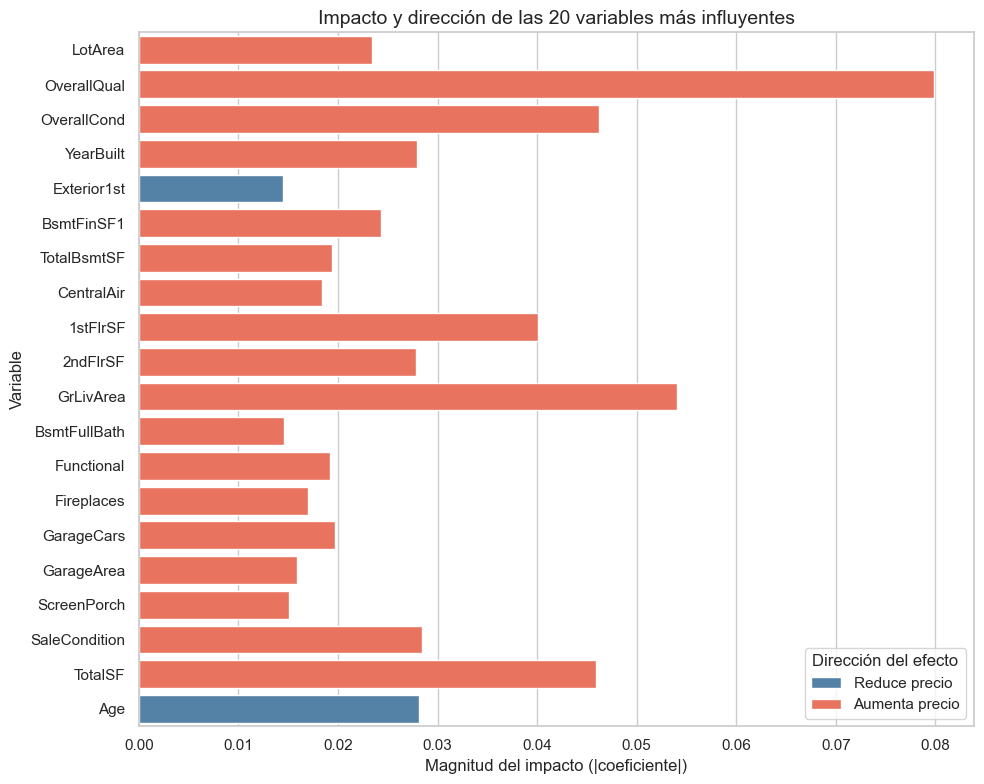

In [45]:
coef_df = pd.DataFrame({
    "Feature": X_train_final.columns,
    "Coefficient": model.coef_
})

coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

print("Top 10 variables más influyentes:")
print(coef_df.head(10))

plt.figure(figsize=(10, 8))
sns.barplot(
    x="Abs_Coefficient",
    y="Feature",
    hue=(coef_df["Coefficient"] > 0).map({True: "Aumenta precio", False: "Reduce precio"}),
    data=coef_df.head(20),
    dodge=False,
    palette={"Aumenta precio": "tomato", "Reduce precio": "steelblue"}
)
plt.title("Impacto y dirección de las 20 variables más influyentes", fontsize=14)
plt.xlabel("Magnitud del impacto (|coeficiente|)")
plt.ylabel("Variable")
plt.legend(title="Dirección del efecto")
plt.tight_layout()
plt.show()


# Captura de Kaggle

#### Puntaje:

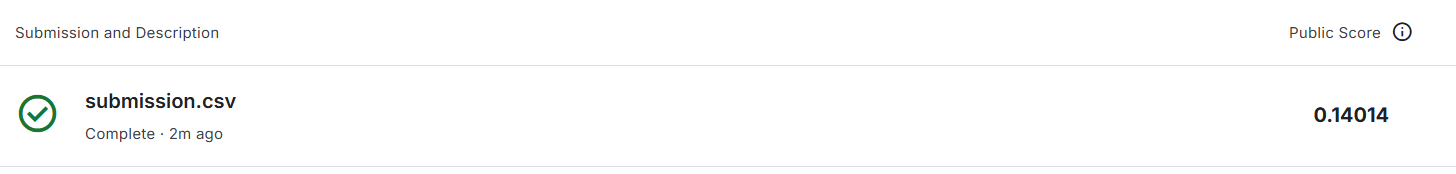

#### Posicion en el leaderboard

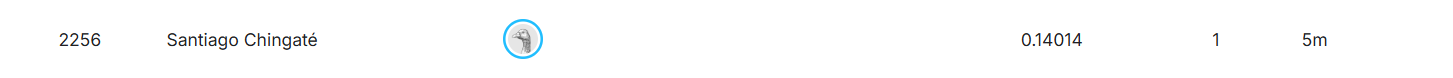